In [6]:
# Packages:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import datetime
import numpy as np
import warnings
from textblob import TextBlob
import re
from wordcloud import WordCloud
import scipy.stats as st
import scipy
from scipy import stats
import statsmodels.api as sm

In [9]:
df = pd.read_csv('data/processed/trader_cleaned.csv')
df.head()

,Date,Price,Price_scaled,Price_delta,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
0,2021-12-02,295.75,0.914050,NaN,Great quote. stolen &amp; disseminatedTalk i...,20.0,28.0,64.0,0.339627,0.241893,0.379331,0.247805,0.201258,0.000721
1,2021-12-01,287.25,0.857851,-0.056198,Black Sea Futures:\n\n🌾Black Sea Wheat- 75.5kt...,13.0,30.0,31.0,0.164359,-0.000897,0.131526,-0.014569,0.097484,0.000773
2,2021-11-30,285.50,0.846281,-0.011570,_Cycles You can never have too much socks… 🧦 ...,20.0,16.0,74.0,0.241554,0.013376,0.146095,-0.049080,0.232704,0.000412
3,2021-11-29,297.50,0.925620,0.079339,Not yet. It’ll be higher in January: GASC- Bi...,28.0,2136.0,124.0,0.287041,0.061463,0.195174,-0.113520,0.389937,0.055027
4,2021-11-26,302.75,0.960331,0.034711,💥 🇪🇬 🌾 GASC has announced a wheat 🌾 tender for...,9.0,3.0,26.0,0.399537,0.172685,0.308694,0.204819,0.081761,0.000077


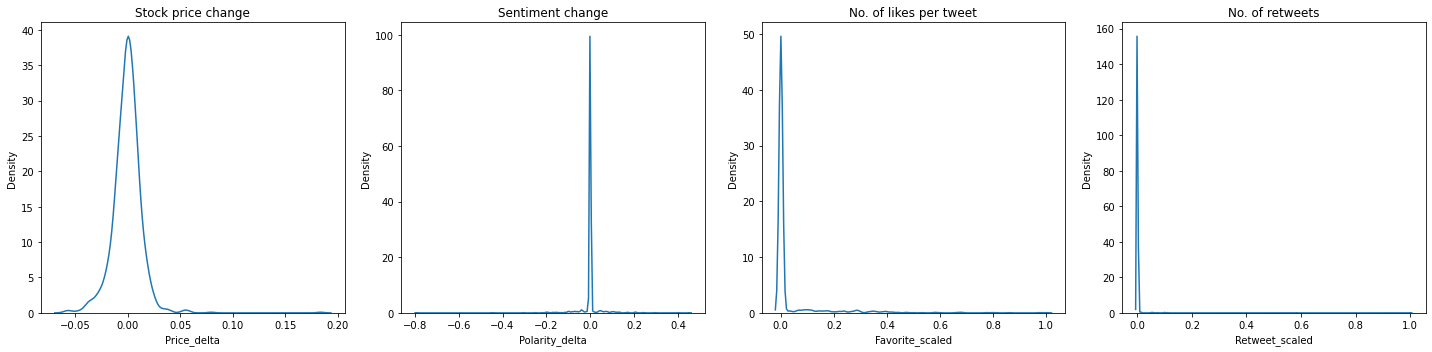

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 5))

sns.kdeplot(ax=ax1, x=df['Price_delta'], bw_adjust=1).set_title('Stock price change')
sns.kdeplot(ax=ax2, x=df['Polarity_delta'], bw_adjust=0.27).set_title('Sentiment change')
sns.kdeplot(ax=ax3, x=df['Favorite_scaled'], bw_adjust=0.27).set_title('No. of likes per tweet')
sns.kdeplot(ax=ax4, x=df['Retweet_scaled'], bw_adjust=0.27).set_title('No. of retweets')

plt.tight_layout()

In [11]:
df.describe()

,Price,Price_scaled,Price_delta,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
count,1279.000000,1279.000000,1260.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000
mean,191.681392,0.225993,-0.000673,2.490421,70.027586,10.416092,0.041069,0.012801,0.031536,-0.000476,0.032755,0.001804
std,26.243584,0.173511,0.013954,7.703782,1265.541459,34.335911,0.110523,0.047657,0.086331,0.048259,0.107975,0.032603
min,157.500000,0.000000,-0.059504,0.000000,0.000000,0.000000,0.000000,-0.129762,0.000000,-0.789567,0.000000,0.000000
25%,172.250000,0.097521,-0.008264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,185.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,204.500000,0.310744,0.006612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,308.750000,1.000000,0.183471,64.000000,38817.000000,318.000000,1.000000,0.850000,1.000000,0.451199,1.000000,1.000000


In [12]:
#from scipy.stats import boxcox

#df['transformed_return'], lam = boxcox(df["Return"])


In [12]:
numeric_df = df.filter(items=['Price_scaled','Price_delta', 'Polarity_delta', 'Favorite_scaled', 'Retweet_scaled'])
corr1 = numeric_df.corr()
corr2 = numeric_df.corr(method='spearman')

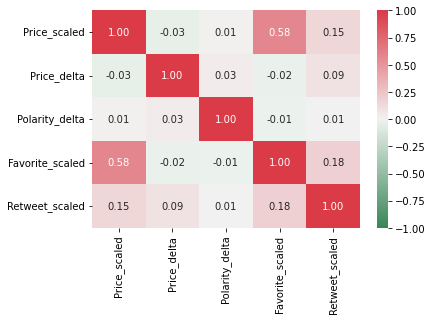

In [13]:
sns.heatmap(corr1, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

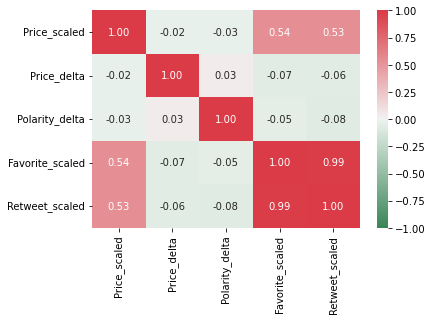

In [14]:
sns.heatmap(corr2, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [15]:
print("H0: the changes in stock market prices are different compared to the change in CEO's Twitter sentiment") 
print("H1: the changes in stock market prices are similar compared to the change in CEO's Twitter sentiment")

statistic = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[0]
pvalue = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[1]

print('statistic = ',statistic)
print('pvalue = ',pvalue)

if pvalue<= 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

H0: the changes in stock market prices are different compared to the change in CEO's Twitter sentiment
H1: the changes in stock market prices are similar compared to the change in CEO's Twitter sentiment
statistic =  -0.14172434661676656
pvalue =  0.8873164288732253
We fail to reject the null hypothesis


In [18]:
print("H0: the changes in stock market prices are different compared to the change in CEO's number of likes on Twitter") 
print("H1: the changes in stock market prices are similar compared to the change in CEO's number of likes on Twitter")

statistic = st.ttest_ind(df['Price_scaled'], df['Favorite_scaled'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[0]
pvalue = st.ttest_ind(df['Price_scaled'], df['Favorite_scaled'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[1]

print('statistic = ',statistic)
print('pvalue = ',pvalue)

if pvalue<= 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

H0: the changes in stock market prices are different compared to the change in CEO's Twitter sentiment
H1: the changes in stock market prices are similar compared to the change in CEO's Twitter sentiment
statistic =  33.91044931926181
pvalue =  5.9191412535660305e-202
We reject the null hypothesis


C:\Users\Amalia\anaconda3\envs\dstoolkit\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


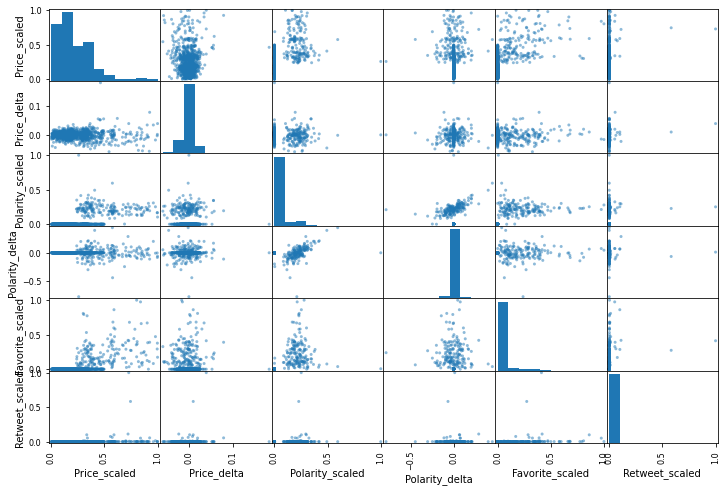

In [31]:
from pandas.plotting import scatter_matrix
df_sm = df[['Price_scaled','Price_delta', 'Polarity_scaled','Polarity_delta','Favorite_scaled', 'Retweet_scaled']]
df_sm.dropna(inplace=True)
scatter_matrix(df_sm, figsize=(12,8));

In [20]:
scipy.stats.shapiro(df_sm['Price_delta'])

ShapiroResult(statistic=0.8744916915893555, pvalue=1.1390822378112163e-30)

In [21]:
scipy.stats.shapiro(df_sm['Polarity_delta'])

ShapiroResult(statistic=0.3556768298149109, pvalue=0.0)

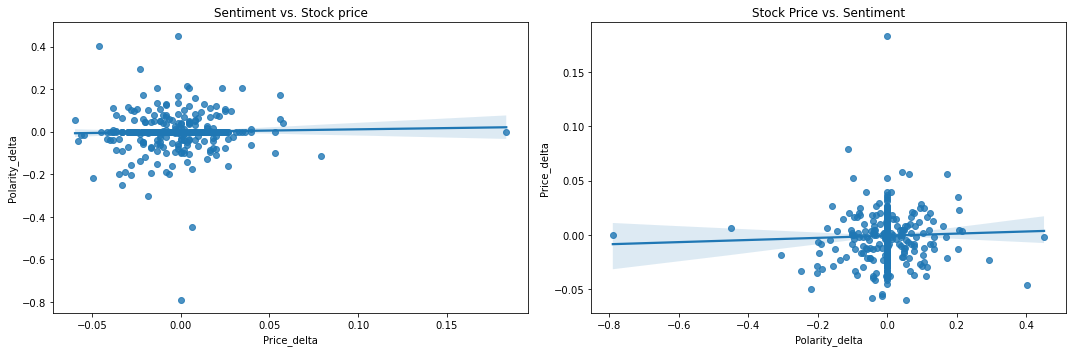

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Polarity_delta', lowess=False, ax=ax1).set(title='Sentiment vs. Stock price')
sns.regplot(data = df_sm, x='Polarity_delta', y='Price_delta', lowess=False, ax=ax2).set(title='Stock Price vs. Sentiment')

plt.tight_layout()

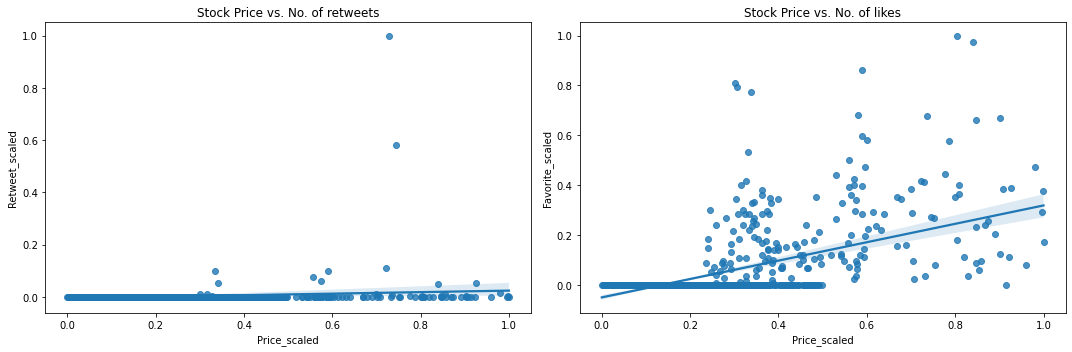

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_scaled', y='Retweet_scaled', lowess=False, ax=ax1). set(title='Stock Price vs. No. of retweets')
sns.regplot(data = df_sm, x='Price_scaled', y='Favorite_scaled', lowess=False, ax=ax2). set(title='Stock Price vs. No. of likes')

plt.tight_layout()

In [24]:
X = df_sm['Price_delta']
y = df_sm['Polarity_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Polarity_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.422
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.233
Time:                        09:14:19   Log-Likelihood:                 2043.0
No. Observations:                1260   AIC:                            -4082.
Df Residuals:                    1258   BIC:                            -4072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0006      0.001     -0.452      

In [25]:
X = df_sm['Polarity_delta']
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.422
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.233
Time:                        09:14:25   Log-Likelihood:                 3596.0
No. Observations:                1260   AIC:                            -7188.
Df Residuals:                    1258   BIC:                            -7178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0007      0.000     -1.

In [26]:
X = df_sm[['Favorite_scaled']]
y = df_sm['Price_scaled']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_scaled   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     651.1
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          4.42e-116
Time:                        09:14:47   Log-Likelihood:                 684.95
No. Observations:                1260   AIC:                            -1366.
Df Residuals:                    1258   BIC:                            -1356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1953      0.004     

In [27]:
X = df_sm[['Retweet_scaled']]
y = df_sm['Price_scaled']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_scaled   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     29.23
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           7.69e-08
Time:                        09:15:01   Log-Likelihood:                 436.64
No. Observations:                1260   AIC:                            -869.3
Df Residuals:                    1258   BIC:                            -859.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2248      0.005     46.

In [35]:
X = df_sm[['Retweet_scaled', 'Polarity_scaled','Favorite_scaled']]
y = df_sm['Price_scaled']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_scaled   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     295.1
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          5.85e-145
Time:                        09:30:33   Log-Likelihood:                 758.25
No. Observations:                1260   AIC:                            -1509.
Df Residuals:                    1256   BIC:                            -1488.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1852      0.004     

In [36]:
X = df_sm[['Polarity_scaled','Favorite_scaled']]
y = df_sm['Price_scaled']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_scaled   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     440.2
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          1.23e-145
Time:                        09:33:23   Log-Likelihood:                 756.64
No. Observations:                1260   AIC:                            -1507.
Df Residuals:                    1257   BIC:                            -1492.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1851      0.004     